# Bridging Neural Dynamics: extending TRFs

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Hugo-W/CNSP2025-tutorial-HWeissbart/main)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Hugo-W/CNSP2025-tutorial-HWeissbart/blob/main/tutorial_1.ipynb)
[![Deepnote](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://deepnote.com/launch?url=https://github.com/Hugo-W/CNSP2025-tutorial-HWeissbart/blob/main/tutorial_1.ipynb)

In this tutorial we will explore how to build upon the linear forward encoding framework in the context of naturalistic speech presentation (continuous trial) to incorporate non-linear mapping, phase-amplitude coupling and hierarchical representations.

## Imports and Data download

First let's get all the libraries, data and path setup.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, HTML, HTMLMath, Checkbox, FloatSlider, IntSlider, Dropdown, interact, Button
import tqdm.notebook as tqdm
import sys, os
import subprocess
import urllib.request

# Set widget backend to use widgets:
%matplotlib widget

Downloading the dataset if they are not already present in the `data/` folder.

In [ ]:
def download_file(url, save_path):
    if sys.platform == "win32":
        # Use PowerShell Invoke-WebRequest on Windows
        powershell_command = f"Invoke-WebRequest -Uri {url} -OutFile {save_path}"
        subprocess.run(["powershell", "-Command", powershell_command], check=True)
    else:
        # Use wget on Unix-like systems
        subprocess.run(["wget", url, "-O", save_path], check=True)

data_dir = "../data/sub-001"
file_name = "audioBook-filtered-ICAed-raw.fif"
file_path = os.path.join(data_dir, file_name)
url = f"https://osf.io/gsvbd/files/osfstorage/{file_name}"

# Check if the data directory exists, if not create it
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Check if the file already exists
if not os.path.exists(file_path):
    print(f"File {file_name} not found. Downloading...")
    download_file(url, file_path)
else:
    print(f"File {file_name} already exists in the {data_dir} directory.")

File README.md already exists in the ../data directory.


interactive(children=(FloatSlider(value=1.0, description='frequency', max=5.0, min=0.1), FloatSlider(value=1.0…

<function __main__.plot_oscillator(frequency, amplitude, phase, rescale_y)>

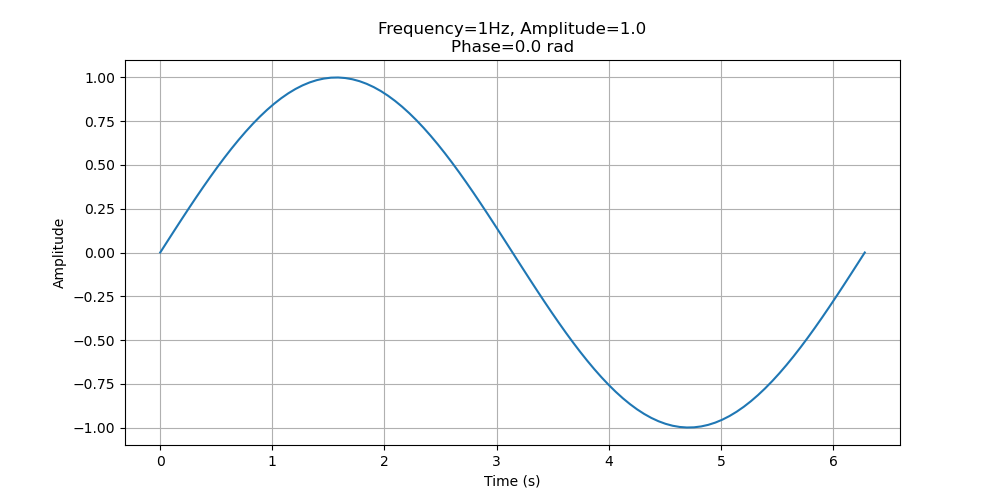

In [13]:
# Quickly testing interactive plotting:

figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot(111)
t = np.linspace(0, 2 * np.pi, 100)
# Initialise plot:
y = 1 * np.sin(1 * t + 0)
line, = ax.plot(t, y)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.grid()

def plot_oscillator(frequency, amplitude, phase, rescale_y):
    y = amplitude * np.sin(frequency * t + phase)
    # ax.clear()  # Clear the previous plot
    # ax.plot(t, y)
    line.set_ydata(y)
    ax.set_title(f'Frequency={frequency:.0f}Hz, Amplitude={amplitude:.1f}\nPhase={phase:.1f} rad')
    if rescale_y:
        ax.axes.relim()
        ax.autoscale_view(scaley=True)
    figure.canvas.draw_idle()

interact(plot_oscillator,
         frequency=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1),
         amplitude=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1),
         phase=    FloatSlider(value=0.0, min=0.0, max=2*np.pi, step=0.1),
         rescale_y=Checkbox())